## Importing package

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib as plt
import os

## Data Wrangling

### Importing Data

In [2]:
data_frames = {}
data_folder_path = '../data'

for filename in os.listdir(data_folder_path):
    name = os.path.splitext(filename)[0]
    filepath = os.path.join(data_folder_path, filename)
    data_frames[name] = pd.read_csv(filepath)

print(data_frames)

{'product_checkout':              date  checkout_id  is_checkout  qty unit_price
0      2024-12-27      6119008            0    0  Rp 25.000
1      2024-12-27      7003039            0    0  Rp 25.000
2      2024-12-28      2570606            0    0  Rp 25.000
3      2024-12-28      7988659            1    3  Rp 25.000
4      2024-12-28      9540890            1    1  Rp 25.000
...           ...          ...          ...  ...        ...
10462  2025-06-01      9560732            1    2  Rp 25.000
10463  2025-06-01      9615881            0    0  Rp 25.000
10464  2025-06-01      9739102            0    0  Rp 25.000
10465  2025-06-01      9803864            0    0  Rp 25.000
10466  2025-06-01      9823285            0    0  Rp 25.000

[10467 rows x 5 columns], 'campaign_budget':            date  campaign_id  budget
0    2024-12-31            1   15310
1    2024-12-31            2   17402
2    2025-01-01            1   18546
3    2025-01-01            2   14592
4    2025-01-02            1

In [3]:
data_frames['campaign_result'].sort_values(by= 'date')

,date,campaign_id,user_id,checkout_id,is_click
0,2024-12-31,1,1,5073872,0.0
299,2024-12-31,2,32273,9177988,0.0
298,2024-12-31,2,32272,7019288,0.0
297,2024-12-31,2,32271,5551942,1.0
296,2024-12-31,2,32270,6957605,0.0
...,...,...,...,...,...
65289,2025-06-01,1,32147,4025058,0.0
65288,2025-06-01,1,32146,8713066,0.0
65287,2025-06-01,1,32145,9215035,0.0
65297,2025-06-01,1,32155,5606615,0.0


In [4]:
data_frames['product_checkout'].sort_values(by= 'date')

,date,checkout_id,is_checkout,qty,unit_price
0,2024-12-27,6119008,0,0,Rp 25.000
1,2024-12-27,7003039,0,0,Rp 25.000
2,2024-12-28,2570606,0,0,Rp 25.000
3,2024-12-28,7988659,1,3,Rp 25.000
4,2024-12-28,9540890,1,1,Rp 25.000
...,...,...,...,...,...
10435,2025-06-01,4408633,0,0,Rp 25.000
10436,2025-06-01,4417313,1,3,Rp 25.000
10437,2025-06-01,4449115,0,0,Rp 25.000
10426,2025-06-01,2948609,0,0,Rp 25.000


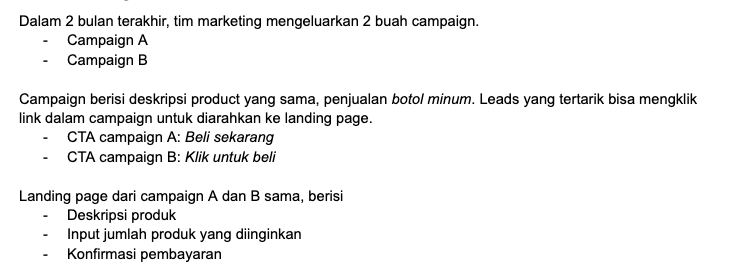

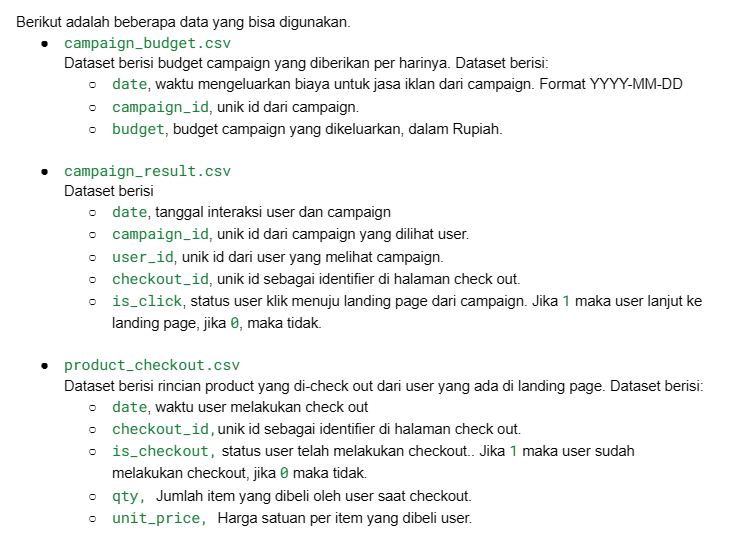

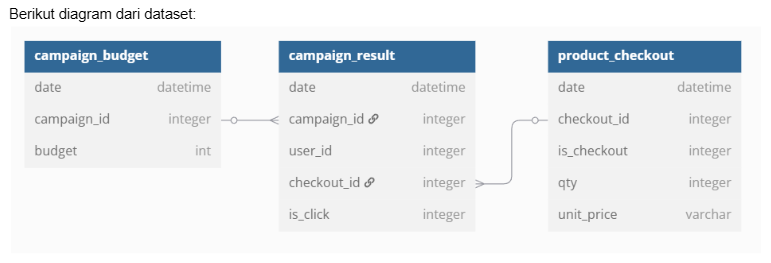

### Cleaning Data

### VALIDATION 

In [5]:
import ipywidgets as widgets
from IPython.display import display

tasks = [
    "Collect Data",
    "Clean Data",
    "Train Model",
    "Evaluate Model",
]

# Create checklist rows
rows = []
for task in tasks:
    checkbox = widgets.Checkbox(value=False, description=task)
    rows.append(checkbox)

# Display all rows
for row in rows:
    display(row)


Checkbox(value=False, description='Collect Data')

Checkbox(value=False, description='Clean Data')

Checkbox(value=False, description='Train Model')

Checkbox(value=False, description='Evaluate Model')

#### campaign_budget

In [6]:
# Checking campaign_budget 
print(f"Unique campaign_id : {data_frames['campaign_budget']['campaign_id'].unique()}")
print(f"Total budget isn't null or less than null : {(data_frames['campaign_budget']['budget'] <= 0).sum()}")

# Case 1 campaign id = bisa koma -> tanya marketing
# Case 2 campaign id tidak boleh missing -> tanya marketing
# Case 3 campagin id

Unique campaign_id : [1 2]
Total budget isn't null or less than null : 0


#### campaign_result

In [7]:
# Checking campaign_result 
print(f"Unique campaign_id : {data_frames['campaign_result']['campaign_id'].unique()}")
print(f"Number of duplicated checkout_id : {(data_frames['campaign_result']['checkout_id'].duplicated()).sum()}")
print(f"Number of duplicated user_id : {(data_frames['campaign_result']['user_id'].duplicated()).sum()}")
print(f"Unique is_click state : {data_frames['campaign_result']['is_click'].unique()}")
print(f"Check if checkout_id is duplicated : {(data_frames['campaign_result']['checkout_id'].duplicated()).sum()}")

Unique campaign_id : [1 2]
Number of duplicated checkout_id : 0
Number of duplicated user_id : 2370
Unique is_click state : [ 0.  1. nan]
Check if checkout_id is duplicated : 0


In [8]:
data_frames['campaign_result'] = data_frames['campaign_result'][data_frames['campaign_result']['is_click'].isin([0,1])]
data_frames['campaign_result']['is_click'] = data_frames['campaign_result']['is_click'].astype(int)
print(f"Unique is_click state : {data_frames['campaign_result']['is_click'].unique()}")

Unique is_click state : [0 1]


#### product_checkout

In [9]:
print(f"Check if checkout_id is duplicated : {(data_frames['product_checkout']['checkout_id'].duplicated()).sum()}")
print(f"Unique is_click state : {data_frames['product_checkout']['is_checkout'].unique()}")
print(f"Check if qty have 0 or less than 0 : {(data_frames['product_checkout']['qty'] < 0).sum()}")
print(f"Check data type of unit_price : {data_frames['product_checkout']['unit_price'].dtypes} | {data_frames['product_checkout']['unit_price'].unique()}")

Check if checkout_id is duplicated : 0
Unique is_click state : [0 1]
Check if qty have 0 or less than 0 : 41
Check data type of unit_price : object | ['Rp 25.000']


In [10]:
if data_frames['product_checkout']['unit_price'].dtypes == object or data_frames['product_checkout']['unit_price'].dtypes == str:
    data_frames['product_checkout']['unit_price'] = data_frames['product_checkout']['unit_price'].str.replace('Rp', '',).str.replace('.', '').astype(int)

else :
    pass

data_frames['product_checkout'] = data_frames['product_checkout'][data_frames['product_checkout']['qty'] >= 0 ]
print(f"Check if qty have 0 or less than 0 : {(data_frames['product_checkout']['qty'] < 0).sum()}")
print(data_frames['product_checkout']['unit_price'].dtypes)

Check if qty have 0 or less than 0 : 0
int64


### EDA

In [11]:
def calculate_engagement_rate(num_engagements, num_impressions):

    ''' 
    This function is used for calculate Engagement Rate

    num_engangement : total of leads did click (because only click is available)
    num_impressions : total of users interact with campaign
    
    '''
    engagement_rate = (num_engagements / num_impressions) * 100

    return engagement_rate

def calculate_ctr(total_conversions, total_interactions):

    ''' 
    This function is used to calculate Click Through Rate (CTR)

    total_conversions : total of leads clicked to go landing page (possible double click or more)
    total_interactions : total of users interact with campaign

    '''

    ctr_val = (total_conversions / total_interactions) * 100

    return ctr_val

def calculate_conversion_rate(total_buyer, total_interactions):

    ''' 
    This function is used to calculate Conversion Rate 

    total_buyer : total of leads that checkout / buy something
    total_interactions : total of users that interact with campaign

    '''

    conversion_rate = (total_buyer / total_interactions) * 100

    return conversion_rate

def calculate_revenue(total_marketing_spend, total_income):

    revenue = total_income - total_marketing_spend

    return revenue

def calculate_cpl(total_marketing_spend, num_leads):

    ''' 
    This function is used to calculate Cost Per Lead (CPL)

    total_marketing_spend : total spend of marketing campaign
    num_leads : total of users that clicked to go landing page

    '''

    cpl_val = total_marketing_spend / num_leads 

    return cpl_val

def calculate_cac(total_marketing_spend, new_customers):

    ''' 
    This function is used to calculate Customer Acquisition Cost (CAC)

    total_marketing_spend : total spend of marketing campaign
    new_customers : customer that buy something after campaign happened

    '''

    cac_val = total_marketing_spend/ new_customers

    return cac_val


In [12]:
campaign_budget_a = data_frames['campaign_budget'][data_frames['campaign_budget']['campaign_id'] == 1]
campaign_budget_b = data_frames['campaign_budget'][data_frames['campaign_budget']['campaign_id'] == 2]

campaign_result_a = data_frames['campaign_result'][data_frames['campaign_result']['campaign_id'] == 1]
campaign_result_b = data_frames['campaign_result'][data_frames['campaign_result']['campaign_id'] == 2]

product_checkout = data_frames['product_checkout']
product_checkout_a = data_frames['product_checkout'][data_frames['product_checkout']['checkout_id'].isin(campaign_result_a['checkout_id'])]
product_checkout_b = data_frames['product_checkout'][data_frames['product_checkout']['checkout_id'].isin(campaign_result_b['checkout_id'])]

campaign_budget_a.loc[:,'date'] = pd.to_datetime(campaign_budget_a['date'])
campaign_budget_b.loc[:,'date'] = pd.to_datetime(campaign_budget_b['date'])

product_checkout.loc[:,'date'] = pd.to_datetime(product_checkout['date'])

start_marketing_date_a = campaign_budget_a['date'].min()
start_marketing_date_b = campaign_budget_b['date'].min()

total_income_a = product_checkout[product_checkout['date'] >= start_marketing_date_a].copy()
total_income_a['profit'] = total_income_a['qty'] * total_income_a['unit_price']
total_income_a = sum(total_income_a['profit'])

total_income_b = product_checkout[product_checkout['date'] >= start_marketing_date_b].copy()
total_income_b['profit'] = total_income_b['qty'] * total_income_b['unit_price']
total_income_b = sum(total_income_b['profit'])


df_result_product_a = campaign_result_a.join(product_checkout_a.set_index('checkout_id'), on= 'checkout_id', lsuffix= '_result', rsuffix= '_product')
df_result_product_b = campaign_result_b.join(product_checkout_b.set_index('checkout_id'), on= 'checkout_id', lsuffix= '_result', rsuffix= '_product')

# Efektifitas Campaign
engagement_rate_a = calculate_engagement_rate(
    len(campaign_result_a[campaign_result_a['is_click'] == 1]['user_id'].unique()),
    len(campaign_result_a)
)

engagement_rate_b = calculate_engagement_rate(
    len(campaign_result_b[campaign_result_b['is_click'] == 1]['user_id'].unique()),
    len(campaign_result_b)
)

ctr_campaign_a = calculate_ctr(
    len(campaign_result_a[(campaign_result_a['is_click'] == 1)]),
    len(campaign_result_a)
)

ctr_campaign_b = calculate_ctr(
    len(campaign_result_b[campaign_result_b['is_click'] == 1]),
    len(campaign_result_b)
)

conversion_rate_campaign_a = calculate_conversion_rate(
    len(
        product_checkout[
            (product_checkout['date'] >= start_marketing_date_a) &
            (product_checkout['checkout_id'].isin(campaign_result_a['checkout_id'])) &
            (product_checkout['is_checkout'] == 1)
        ]
    ),
    len(
        campaign_result_a['user_id'].unique()
    )
)

conversion_rate_campaign_b = calculate_conversion_rate(
    len(
        product_checkout[
            (product_checkout['date'] >= start_marketing_date_b) &
            (product_checkout['checkout_id'].isin(campaign_result_b['checkout_id'])) &
            (product_checkout['is_checkout'] == 1)
        ]
    ),
    len(
        campaign_result_b['user_id'].unique()
    )
)

revenue_campaign_a = calculate_revenue(
    sum(campaign_budget_a['budget']),
    total_income_a
)

revenue_campaign_b = calculate_revenue(
    sum(campaign_budget_b['budget']),
    total_income_b
)

# Biaya campaign
cpl_campaign_a = calculate_cpl(
    sum(campaign_budget_a['budget']),
    len(campaign_result_a[campaign_result_a['is_click'] == 1])
)

cpl_campaign_b = calculate_cpl(
    sum(campaign_budget_b['budget']),
    len(campaign_result_b[campaign_result_b['is_click'] == 1])
)

# ========= old CAC
# cac_campaign_a = calculate_cac(
#     sum(campaign_budget_a['budget']),
#     len(
#         product_checkout[
#             (product_checkout['date'] >= start_marketing_date_a) &
#             (product_checkout['checkout_id'].isin(campaign_result_a['checkout_id'])) &
#             (product_checkout['is_checkout'] == 1)
#         ]
#     )
# )


# cac_campaign_b = calculate_cac(
#     sum(campaign_budget_b['budget']),
#     len(
#         product_checkout[
#             (product_checkout['date'] >= start_marketing_date_b) &
#             (product_checkout['checkout_id'].isin(campaign_result_b['checkout_id'])) &
#             (product_checkout['is_checkout'] == 1)
#         ]
#     )
# )

cac_campaign_a = calculate_cac(
    sum(campaign_budget_a['budget']),
    len(
        df_result_product_a[
            (df_result_product_a['date_product'] >= start_marketing_date_a) &
            (df_result_product_a['is_checkout'] == 1) &
            (df_result_product_a['campaign_id'].isin([1,2]))
        ]
    )
)

cac_campaign_b = calculate_cac(
    sum(campaign_budget_b['budget']),
    len(
        df_result_product_a[
            (df_result_product_a['date_product'] >= start_marketing_date_b) &
            (df_result_product_a['is_checkout'] == 1) &
            (df_result_product_a['campaign_id'].isin([1,2]))
        ]
    )
)

print("Eksplorasi efektifitas campaign: ")
print(f"Engagement rate campagin A : {round(engagement_rate_a, 4)}%")
print(f"Engagement rate campagin B : {round(engagement_rate_b, 4)}%", '\n')
print(f"CTR campagin A : {round(ctr_campaign_a, 4)}%")
print(f"CTR campagin B : {round(ctr_campaign_b, 4)}%", '\n')
print(f"Conversion rate campaign A : {round(conversion_rate_campaign_a, 4)}%")
print(f"Conversion rate campaign B : {round(conversion_rate_campaign_b, 4)}%", '\n')
print(f"Revenue campaign A : Rp.{revenue_campaign_a}")
print(f"Revenue campaign B : Rp.{revenue_campaign_b}", '\n')

print("Eksplorasi biaya campaign: ")
print(f"CPL campaign A : Rp.{round(cpl_campaign_a, 4)}")
print(f"CPL campaign B : Rp.{round(cpl_campaign_b, 4)}", '\n')
print(f"CAC campaign A : Rp.{round(cac_campaign_a, 4)}")
print(f"CAC campaign B : Rp.{round(cac_campaign_b, 4)}")

TypeError: '>=' not supported between instances of 'str' and 'Timestamp'